### Overview: 

The data set for this project has been taken from Kaggle. The data set is simple. This project aims at predicting avertising sales. I believe this problem statement is quite self-explanatory and doesn't need more explanation.

### Dataset:
Advertising Dataset<br>
https://www.kaggle.com/datasets/bumba5341/advertisingcsv

## Step 01: Import all the required Libraries

Let's load the necessary libraries and data and start coding.

- <strong>NumPy</strong> : stands for Numerical Python, is a library consisting of multidimensional array objects and a collection of routines for processing those arrays. Using NumPy, mathematical and logical operations on arrays can be performed.
- <strong>Pandas</strong> : In computer programming, pandas is a software library written for the Python programming language for data manipulation and analysis and storing in a proper way. In particular, it offers data structures and operations for manipulating numerical tables and time series
- <strong>Sklearn</strong> : Scikit-learn (formerly scikits.learn) is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy. The library is built upon the SciPy (Scientific Python) that must be installed before you can use scikit-learn.
- <strong>Pickle</strong> : Python pickle module is used for serializing and de-serializing a Python object structure. Pickling is a way to convert a python object (list, dict, etc.) into a character stream. The idea is that this character stream contains all the information necessary to reconstruct the object in another python script.
- <strong>Matplotlib</strong> : Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible.
- <strong>Seaborn</strong> : Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

In [1]:
# Importing Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pickle
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

## Step 02: Read all the required Data
In this stage we are going to read our problem dataset and have a look on it.

In [2]:
# Loading the data in pandas dataframe
try: 
    dataset = pd.read_csv('Data\Advertising_Data.csv', index_col='Unnamed: 0')
    print("Data Reading Done Successfully....")
    
except (FileNotFoundError, IOError):
    print("Wrong File or File path")

Data Reading Done Successfully....


After we read the data, we can look at the data using:

In [3]:
dataset.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
dataset.tail()

,TV,Radio,Newspaper,Sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


## Step 03: Data Exploration

Now we explore the data using different techniques..

In [5]:
# Checking the rows and columns of the dataset
print (f'The train data has {dataset.shape[0]} rows and {dataset.shape[1]} columns')

The train data has 200 rows and 4 columns


In [6]:
# Getting more insights of the data using .info() method
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


All the columns are float type

In [7]:
# Statistic of the dataset
dataset.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


#### Let's check if the data set has any missing values.

In [8]:
# Chcek Missing values
dataset.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

As we can see there is no missing value present

#### Now let's chcek the distribution of the target varibale

<AxesSubplot:xlabel='Sales', ylabel='Density'>

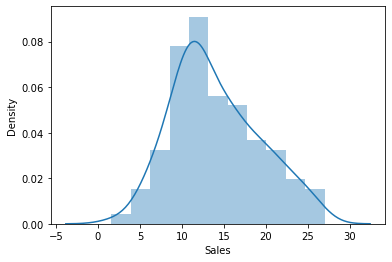

In [9]:
sns.distplot(dataset['Sales'])

We see that the target variable Sales has a no skewed distribution. This is not always our case for target varibale sometime it happens we have right or left skewed distribution. In that case we'll need to log transform (other tranforms) this variable so that it becomes normally distributed. A normally distributed (or close to normal) target variable helps in better modeling the relationship between target and independent variables. In addition, linear algorithms assume constant variance in the error term. Alternatively, we can also confirm this skewed behavior using the skewness metric.

In [10]:
# Checking for Correlation
corr = dataset.corr()
corr

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

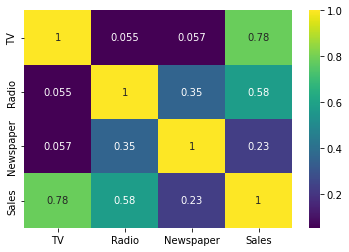

In [11]:
#correlation plot using heatmap
sns.heatmap(corr, annot=True, cmap='viridis')

Notice the last row of this map. We can see the correlation of all variables against Sales. As you can see, some variables seem to be strongly correlated with the target variable.

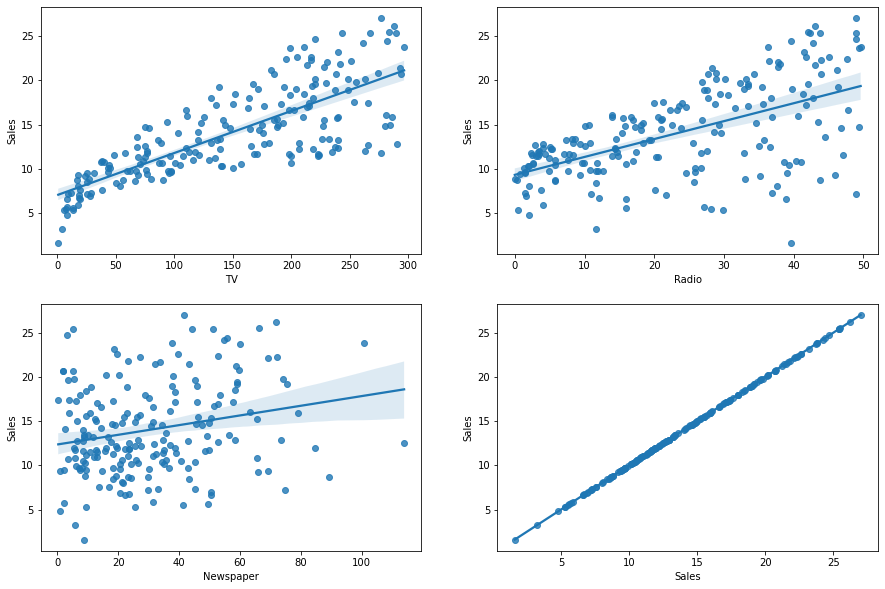

In [12]:
# Checking the distribution of all the variable against target varuable
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
count = 0
for i in range(2):
    for j in range(2):
        sns.regplot(x=dataset.columns[count], y=dataset.columns[-1], data=dataset, ax=axis[i,j])
        count += 1

We can see that most of the features have a linear relationship with the Sales target feature

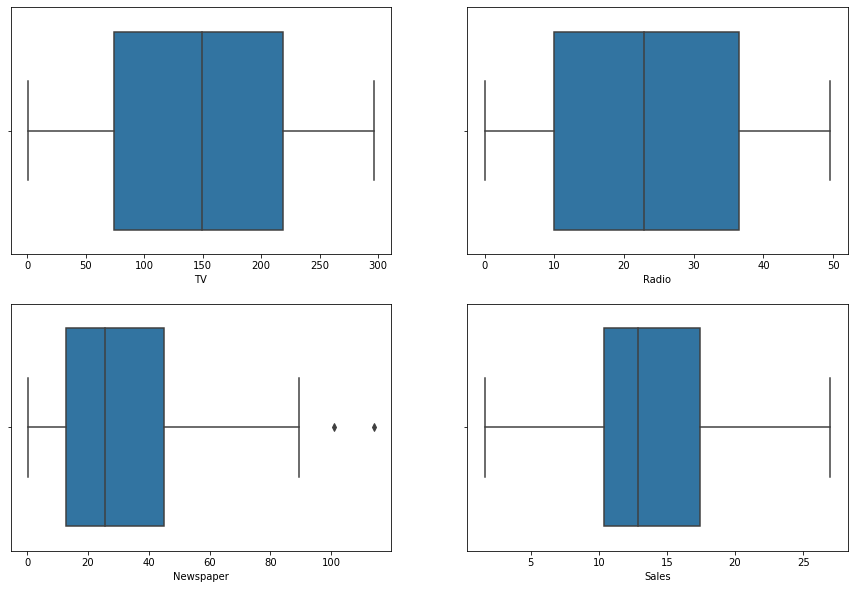

In [13]:
# Checking for outliers
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
count = 0
for i in range(2):
    for j in range(2):
        sns.boxplot(x=dataset.columns[count], data=dataset, ax=axis[i,j])
        count += 1

Here there is only outliers present in the newspaper feature

## Step 04: Data Pre-Processing

In this step, we handle the outliers..

In [14]:
# Detecting the Outliers
outliers = []

def detect_outlier(data):
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)
    
    for i in data:
        z_score = (i-mean)/std
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

In [15]:
detect_outlier(dataset.Newspaper)

[114.0, 100.9]

In [16]:
# Removing outliers
upper_limit = dataset.Newspaper.mean() + 3*dataset.Newspaper.std()
dataset.Newspaper[dataset.Newspaper > upper_limit] = dataset.Newspaper.mean()

<AxesSubplot:xlabel='Newspaper'>

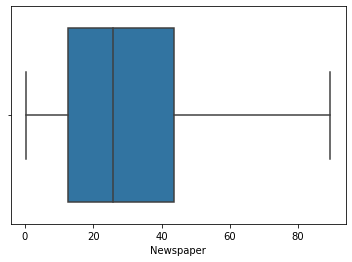

In [17]:
sns.boxplot(x=dataset.Newspaper)

Hence there is no outlier present in the Newspaper feature

In [18]:
# Separate the other features and the target fetaures
X = dataset[dataset.columns[:-1]]

In [19]:
X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [20]:
y = dataset[dataset.columns[-1]]

In [21]:
y

1      22.1
2      10.4
3       9.3
4      18.5
5      12.9
       ... 
196     7.6
197     9.7
198    12.8
199    25.5
200    13.4
Name: Sales, Length: 200, dtype: float64

## Step 5: Split the data into train and test set
- Now our data is ready to feed to the program. But here we'll split the data into train and test dataset so that after training the model we can test the model on the test dataset and find out how accurate are its predictions.
- Here we are splitting the data so that the training dataset contains 80% of the data and the test dataset contains 20% of the total data.
- Here we are using the train_test_split method from the sklearn library. We'll train our model on x_train and y_train, test it on x_test and y_test.

- test_size: Here we specify the size we want for our test dataset.

- random_state: When we use a random number generator for number or sequence generation, we give a starting number (AKA seed). When we provide the same seed, every time it’ll generate the same sequence as the first one. That’s why to keep the same random values every time, we give seed as random_state in train_test_split().

In [22]:
# Splitting the dataset into testing and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [23]:
#display the shapes of the x and y train and test dataset.
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(134, 3) (66, 3) (134,) (66,)


## Step 6: Train the Model using Linear Regression 

In [24]:
# Creating the instance of the Linear regression
lin_reg = LinearRegression()

In [25]:
# Train the model
lin_reg.fit(X_train, y_train)
print("Training is done successfully..")

Training is done successfully..


In [26]:
# Tesing the accuracy score of the model
print(f"The accuracy score of the model is: {round(lin_reg.score(X_test, y_test), 2)*100}%")

The accuracy score of the model is: 86.0%


In [27]:
# make prediction on test data
y_pred = lin_reg.predict(X_test)
y_pred

array([16.58906909, 21.19387139, 21.67866231, 10.80559485, 22.26783115,
       13.31203409, 21.25021077,  7.37939991, 13.44507913, 15.19837924,
        9.01436988,  6.56262896, 14.41284603,  8.93299667,  9.5614945 ,
       12.10777688,  8.85405266, 16.25932365, 10.30736547, 18.84718937,
       19.81461156, 13.16869841, 12.45308875, 21.58720185,  7.67242198,
        5.66420239, 20.96472019, 11.89571131,  9.12729455,  8.49230597,
       12.32493033,  9.98940968, 21.72727637, 12.63959708, 18.26169398,
       20.18752607, 14.21234829, 21.03612955, 10.91801664,  4.41835705,
        9.5918108 , 12.53584832, 10.14229719,  8.12580165, 13.33468499,
        5.26925518,  9.30013634, 14.15671706,  8.75546176, 11.67113103,
       15.66504776, 11.75622277, 13.21068536, 11.05694341,  6.41302772,
        9.84629295,  9.45623047, 24.33878289,  7.68439609, 12.31265573,
       17.59112732, 15.28495559, 11.45464105, 11.11565965, 16.61047089,
        6.89996573])

In [28]:
# Saving the result
result = pd.DataFrame({'y_test':np.array(y_test).reshape(len(y_test)), 'y_pred':y_pred}, index=range(len(y_pred)))
result.y_pred = result.y_pred.apply(lambda x: round(x,1))
result.to_csv('Advertising sales prediction model result.csv')

## Step 7: Save the model in a pickle file
As model is giving very good accuracy we'll go with it and save it to pickle file. We save our model to pickle files so that when we want to perform predictions on unseen data, we don't have to train our model again. Any object in python can be pickled so that it can be saved on disk. What pickle does is that it “serializes” the object first before writing it to file. Pickling is a way to convert a python object (list, dict, etc.) into a character stream.

In [29]:
# Save the model to disk
pickle.dump(lin_reg, open('Advertising Sales Prediction model.pickle', 'wb'))

## Summary
Now our model is ready and whenever we need to make prediction, we just load the model using pickle and make the predictions.